In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
relative_path = "jobs.csv"
absolute_path = os.path.join(parent_dir, relative_path)
df = pd.read_csv(absolute_path)


In [26]:
df["technologies"] = df["technologies"].apply(lambda x: x.strip("[]").replace("'", "").split(", "))

df = df.explode("technologies")

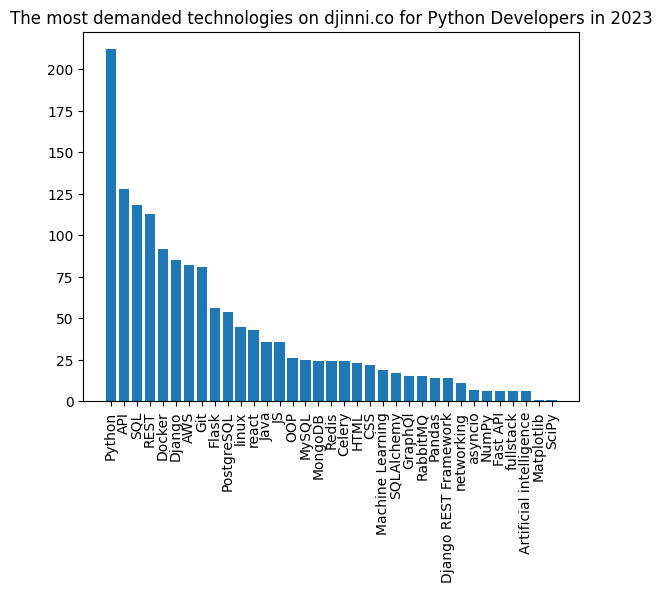

In [27]:
all_technologies = df.groupby("technologies").size().reset_index(name="count")
all_technologies = all_technologies.sort_values(by="count", ascending=False)

plt.figure()
plt.bar(all_technologies["technologies"], all_technologies["count"])
plt.title("The most demanded technologies on djinni.co for Python Developers in 2023")
plt.xticks(rotation=90)
plt.show()

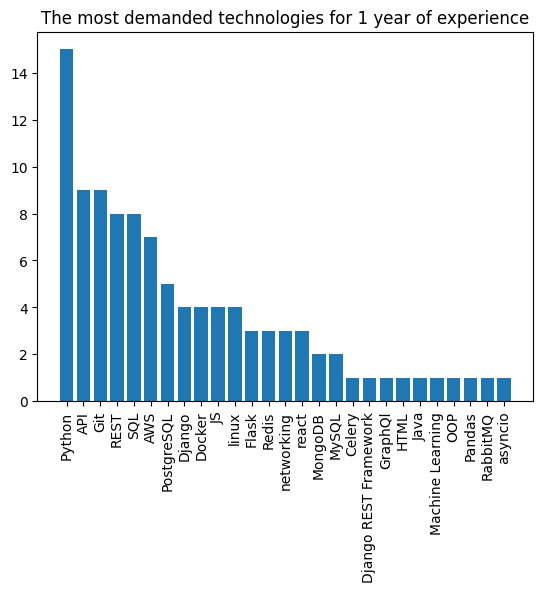

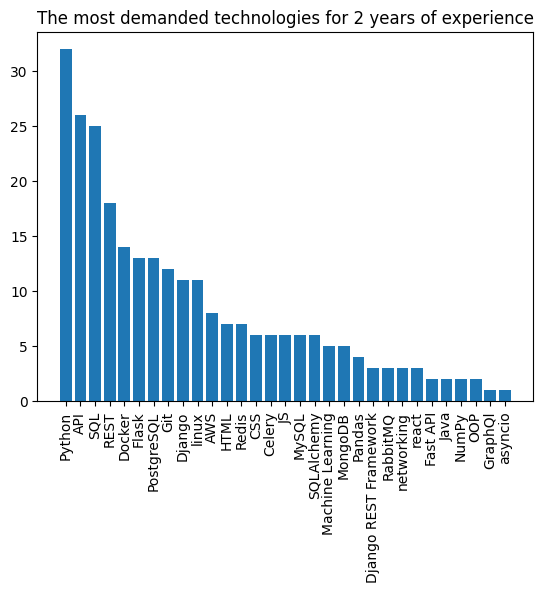

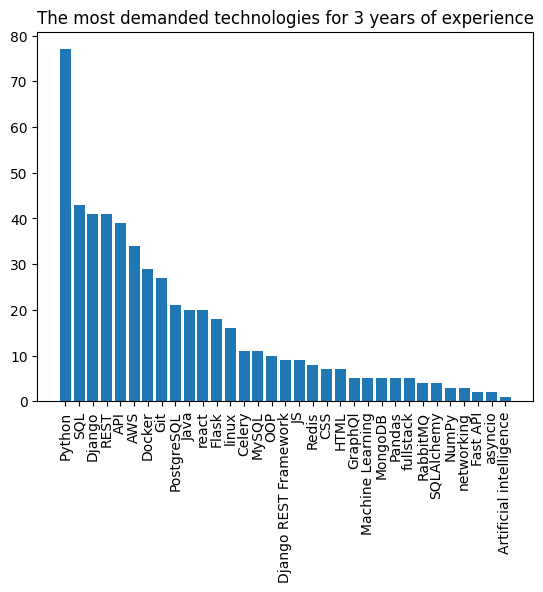

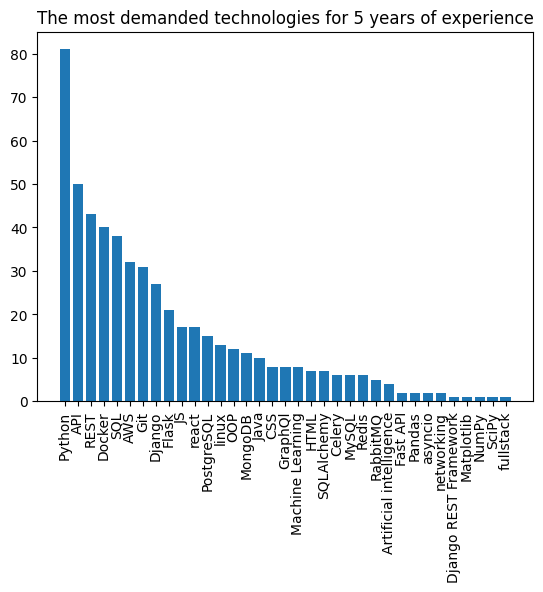

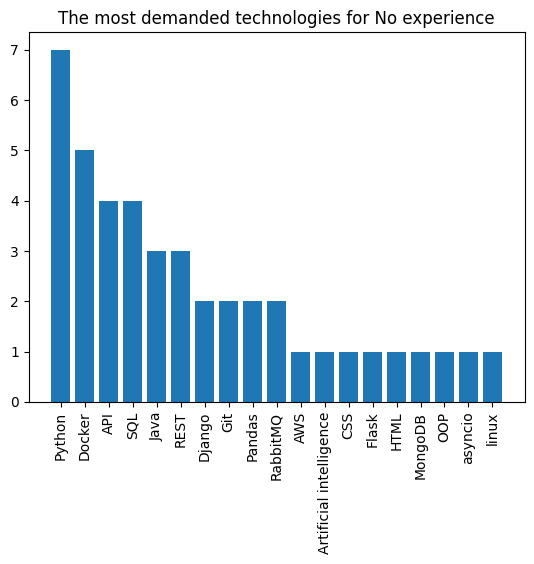

In [28]:
grouped_df = df.groupby(["years_of_experience", "technologies"]).size().reset_index(name="count")
grouped_df = grouped_df.sort_values(by=["years_of_experience", "count"], ascending=[True, False])

for years in grouped_df["years_of_experience"].unique():
    data = grouped_df[grouped_df["years_of_experience"] == years]
    plt.figure()
    plt.bar(data["technologies"], data["count"])
    plt.title(f"The most demanded technologies for {years}")
    plt.xticks(rotation=90)
    plt.show()